In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

# Reading the data

In [34]:
data = pd.read_csv(r'https://raw.githubusercontent.com/shriyagoti/PythonPortfolioProjects/main/WorldHappinessReport2022/WorldHappiness2022.csv')

In [35]:
data

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...
142,Rwanda*,"3,268","0,785","0,133","0,462","0,621","0,187","0,544"
143,Zimbabwe,"2,995","0,947","0,690","0,270","0,329","0,106","0,105"
144,Lebanon,"2,955","1,392","0,498","0,631","0,103","0,082","0,034"
145,Afghanistan,"2,404","0,758","0,000","0,289","0,000","0,089","0,005"


# Exploratory Data Analysis and Data Wrangling

In [36]:
data.columns

Index(['Country', 'Happiness score', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

## Are there any Null Values?

In [37]:
data.isnull().sum()

Country                                       0
Happiness score                               1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64

In [38]:
data.shape

(147, 8)

## String manipulation 

The data consists of " , " character instead of " . " character representing the values in a float format. which doesn't make sense. Hence replaced the character using a string manipuation function

In [39]:
data['Happiness_score'] = data['Happiness score'].str.replace(',','.')
data['GDP per capita'] = data['Explained by: GDP per capita'].str.replace(',','.')
data['Social support'] = data['Explained by: Social support'].str.replace(',','.')
data['Freedom to make life choices'] = data['Explained by: Freedom to make life choices'].str.replace(',','.')
data['Generosity'] = data['Explained by: Generosity'].str.replace(',','.')
data['Perceptions of corruption'] = data['Explained by: Perceptions of corruption'].str.replace(',','.')
data['Healthy life expectancy'] = data['Explained by: Healthy life expectancy'].str.replace(',','.')

In [40]:
final_df = data.drop(['Happiness score','Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption'],axis=1)

## Handling Null Values 

In [41]:
final_df.dropna()

,Country,Happiness_score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Healthy life expectancy
0,Finland,7.821,1.892,1.258,0.736,0.109,0.534,0.775
1,Denmark,7.636,1.953,1.243,0.719,0.188,0.532,0.777
2,Iceland,7.557,1.936,1.320,0.718,0.270,0.191,0.803
3,Switzerland,7.512,2.026,1.226,0.677,0.147,0.461,0.822
4,Netherlands,7.415,1.945,1.206,0.651,0.271,0.419,0.787
...,...,...,...,...,...,...,...,...
141,Botswana*,3.471,1.503,0.815,0.571,0.012,0.102,0.280
142,Rwanda*,3.268,0.785,0.133,0.621,0.187,0.544,0.462
143,Zimbabwe,2.995,0.947,0.690,0.329,0.106,0.105,0.270
144,Lebanon,2.955,1.392,0.498,0.103,0.082,0.034,0.631


In [42]:
final_df.replace(0.000,final_df.mean(axis=0),inplace=True)

C:\Users\gotim\AppData\Local\Temp/ipykernel_14924/317225460.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_df.replace(0.000,final_df.mean(axis=0),inplace=True)


## What are the datatypes?

In [43]:
final_df.dtypes

Country                         object
Happiness_score                 object
GDP per capita                  object
Social support                  object
Freedom to make life choices    object
Generosity                      object
Perceptions of corruption       object
Healthy life expectancy         object
dtype: object

## DataType Conversion

In [44]:
final_df[['Happiness_score', 'GDP per capita', 'Social support', 'Freedom to make life choices','Generosity','Perceptions of corruption','Healthy life expectancy']] = final_df[['Happiness_score', 'GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption','Healthy life expectancy']].astype(float)

In [45]:
final_df.dtypes

Country                          object
Happiness_score                 float64
GDP per capita                  float64
Social support                  float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Healthy life expectancy         float64
dtype: object

## What's the Range and Average Happiness Score for all the countries?

In [46]:
final_df['Happiness_score'].max()

7.821

In [47]:
final_df['Happiness_score'].min()

2.404

The max and min values of Happiness Score are reasonable since all the scores range between 2 to 8

In [48]:
final_df['Happiness_score'].mean()

5.55357534246575

## Is there any correlation between the features?

In [49]:
correlation = final_df.corr()
correlation

,Happiness_score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Healthy life expectancy
Happiness_score,1.000000,0.763677,0.777889,0.624822,0.063785,0.416216,0.740260
GDP per capita,0.763677,1.000000,0.722421,0.458591,-0.164472,0.377589,0.815386
Social support,0.777889,0.722421,1.000000,0.480466,-0.002339,0.223352,0.666760
Freedom to make life choices,0.624822,0.458591,0.480466,1.000000,0.176800,0.402474,0.433166
Generosity,0.063785,-0.164472,-0.002339,0.176800,1.000000,0.096107,-0.098133
Perceptions of corruption,0.416216,0.377589,0.223352,0.402474,0.096107,1.000000,0.362626
Healthy life expectancy,0.740260,0.815386,0.666760,0.433166,-0.098133,0.362626,1.000000


In [50]:
abs(correlation['Happiness_score'].sort_values(ascending=False))

Happiness_score                 1.000000
Social support                  0.777889
GDP per capita                  0.763677
Healthy life expectancy         0.740260
Freedom to make life choices    0.624822
Perceptions of corruption       0.416216
Generosity                      0.063785
Name: Happiness_score, dtype: float64

A high correlation exists between GDP per capita, social support for happiness. I would use these three features to build regression models to predict the target Happiness Score of Each Country. GDP per capita cannot solely be used for the analysis, meaning high GDP per capita does not immediately translate to a higher happiness index. Therefore, besides income, there must be other important factors that contribute to people’s happiness besides money.

## Which Country has the highest happiness score and Why?

In [51]:
final_df[final_df.Happiness_score == final_df.Happiness_score.max()]

,Country,Happiness_score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Healthy life expectancy
0,Finland,7.821,1.892,1.258,0.736,0.109,0.534,0.775


In [52]:
final_df.describe()

,Happiness_score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Healthy life expectancy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,1.410445,0.905863,0.517226,0.147377,0.154781,0.586171
std,1.086843,0.421663,0.280122,0.145859,0.082799,0.127514,0.176336
min,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.888750,1.095500,0.732000,0.440500,0.089000,0.068250,0.463250
50%,5.568500,1.445500,0.957500,0.543500,0.132500,0.119500,0.621500
75%,6.305000,1.784750,1.114250,0.626000,0.197750,0.198500,0.719750
max,7.821000,2.209000,1.320000,0.740000,0.468000,0.587000,0.942000


According to the Happiness Index, Finland has the highest happiness score, 7.8. It is obvious from the maximum values across the columns that Finland has very high values when it comes to GDP per capita, Social Support, and Freedom to make life choices. It has a relatively low score for generosity. While this does not account for all of Finland's Happiness scores, it might explain why they are ranked highest.

In [53]:
final_df.corr()

,Happiness_score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Healthy life expectancy
Happiness_score,1.000000,0.763677,0.777889,0.624822,0.063785,0.416216,0.740260
GDP per capita,0.763677,1.000000,0.722421,0.458591,-0.164472,0.377589,0.815386
Social support,0.777889,0.722421,1.000000,0.480466,-0.002339,0.223352,0.666760
Freedom to make life choices,0.624822,0.458591,0.480466,1.000000,0.176800,0.402474,0.433166
Generosity,0.063785,-0.164472,-0.002339,0.176800,1.000000,0.096107,-0.098133
Perceptions of corruption,0.416216,0.377589,0.223352,0.402474,0.096107,1.000000,0.362626
Healthy life expectancy,0.740260,0.815386,0.666760,0.433166,-0.098133,0.362626,1.000000


Text(0.5, 1.0, 'Correlations of Country Data Features')

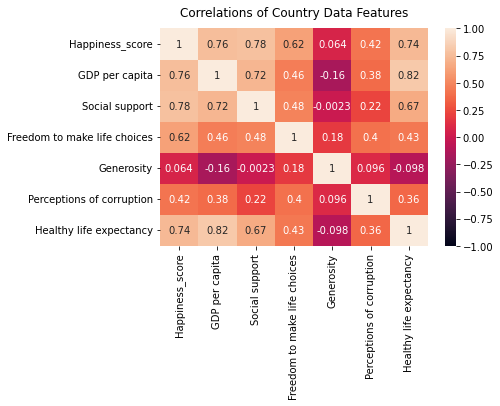

In [54]:
heatmap = sns.heatmap(final_df.corr(),vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlations of Country Data Features', fontdict={'fontsize':12}, pad=12)

Healthy Life Expectancy, Social support and GDP per capita are highly correlated with happiness scores. Similarly, freedom to make life choices is significantly correlated with happiness scores. These features may contribute more than other factors, but correlation does not imply causation. As a result, we can also determine which features to be dropped when we run a regression analysis on this data.